<a href="https://colab.research.google.com/github/FaldoFajri/prediction_customer_churn/blob/main/Belajar_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 13 Multivariate Linear Regression

In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
#mengecek missing value pada masing2 kolom

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Persentase'])
missing_data.head(30)

,Total,Persentase
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Karena terdapat banyak kolom yang mengalami missing value maka dari itu kita akan menghapus kolom dengan persentase 20 - 30 % dari jumlah data yang hilang pada setiap kolom. REFERENSI : https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456

Maka dari itu kolom 'PoolQC' ,'MiscFeature' ,'Alley' ,'Fence' ,'FireplaceQu' akan kita hapus karena kolom-kolom tersebut mengalami missing values diatas 20 persen

In [ ]:
#menghapus kolom dengan missing values 20 persen ke atas

df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'] , axis = 1, inplace = True)

In [ ]:
#mengecek kembali jumlah missing values dari masing2 kolom

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Persentase'])
missing_data.head(20)

,Total,Persentase
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtCond,37,0.025342


Selanjutnya kita isi missing values dengan 2 cara, untuk kolom numeric missing values di isi dengan mean sesuai setiap kolom dan untuk kolom kategori missing values di isi dengan values yg sering muncul pada setiap kolom. 

In [ ]:
#membuat variabel dengan mengambil kolom numeric saja

kolom_numeric=df._get_numeric_data().columns.tolist()
kolom_numeric

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:
#membuat variabel dengan mengambil kolom kategori saja

kolom_kategori=set(df.columns)-set(kolom_numeric)
kolom_kategori

{'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

In [ ]:
#missing values pada kolom numeric di isi dengan mean sesuai kolom masing2

for kolom in kolom_numeric:
    df[kolom].fillna(df[kolom].mean() , inplace = True)

In [ ]:
#missing values pada kolom kategori di isi dengan values yg sering muncul

for kolom in kolom_kategori:
    df[kolom].fillna(df[kolom].mode()[0], inplace = True)

In [ ]:
#mengecek missing values pada setiap kolom
#Alhamdulillah sudah tidak ada missing values disemua kolom

df.isnull().sum().sort_values(ascending=False)[:34]

Id               0
FullBath         0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
BsmtHalfBath     0
MSSubClass       0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
CentralAir       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
dtype: int64

In [ ]:
df_reg = df
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
#mengubah dataset dengan one hot encoding

dfreg = pd.get_dummies(df_reg)
dfreg

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# mendefinisi feature matrix(X) and response vector(y)

X = dfreg.loc[:, dfreg.columns !='SalePrice']
y = dfreg['SalePrice']

In [ ]:
# spliting dataset X dan Y menjadi data train 60% dan data test 40%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# create linear regression object
reg = LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#evaluasi model

y_pred = reg.predict(X_test)

In [ ]:
# Evaluasi menggunakan MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

17864.39327934166

In [ ]:
# Evaluasi menggunakan MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

823620337.322703

In [ ]:
# Evaluasi menggunakan RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

28698.786338845464

In [ ]:
# Evaluasi menggunakan R Square
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8863598415432642

Explain or Interpret the linear correlation between 3 features and the target (“SalePrice”) 

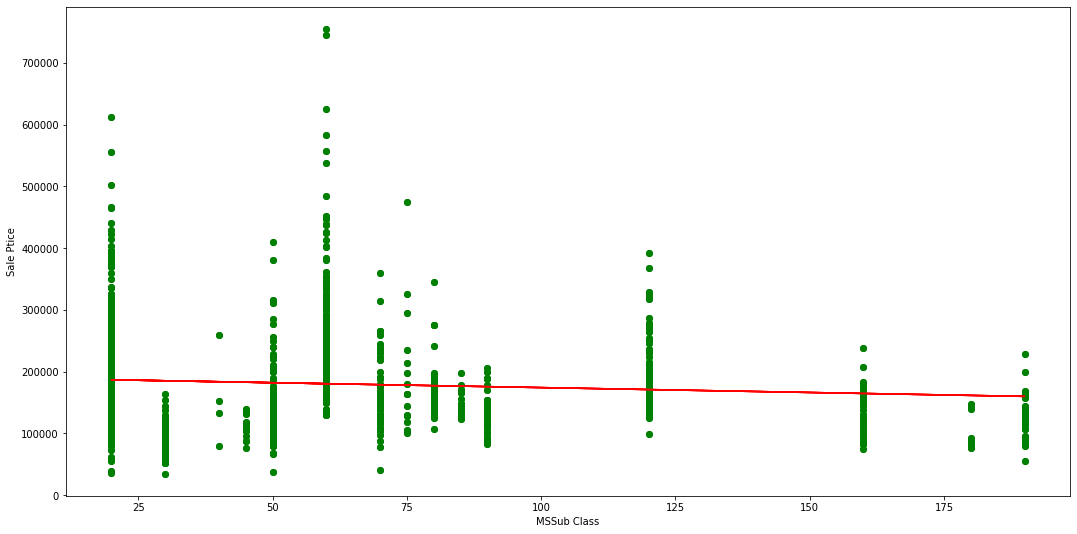

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(18, 9))

x = df['MSSubClass']
y = df['SalePrice']

#use green as color for individual points
plt.plot(x, y , 'o', color='green')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#use red as color for regression line
plt.plot(x, m*x+b, color='red')#use green as color for individual points
plt.plot(x, y, 'o', color='green')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#use red as color for regression line
plt.plot(x, m*x+b, color='red')

plt.xlabel('MSSub Class')
plt.ylabel('Sale Ptice')

plt.show()

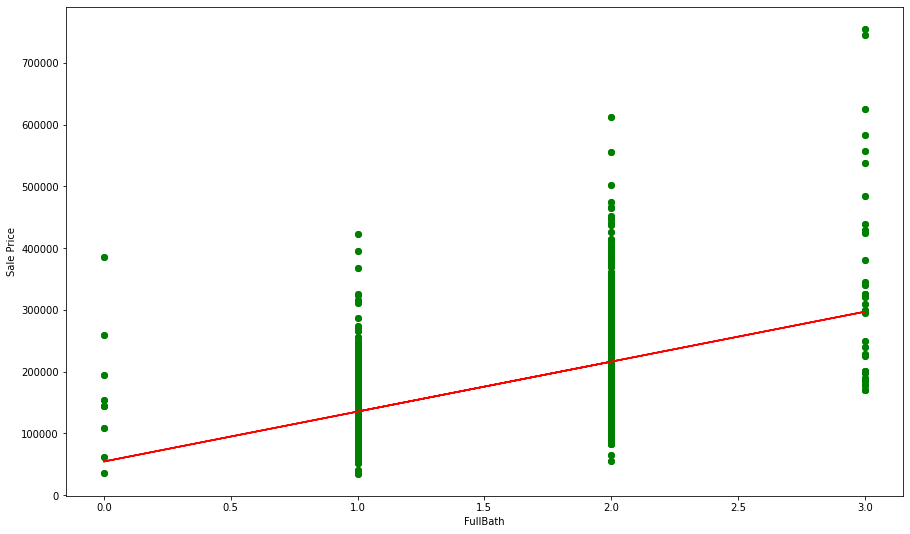

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 9))

x = df['FullBath']
y = df['SalePrice']

#use green as color for individual points
plt.plot(x, y , 'o', color='green')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#use red as color for regression line
plt.plot(x, m*x+b, color='red')#use green as color for individual points
plt.plot(x, y, 'o', color='green')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#use red as color for regression line
plt.plot(x, m*x+b, color='red')

plt.xlabel('FullBath')
plt.ylabel('Sale Price')

plt.show()

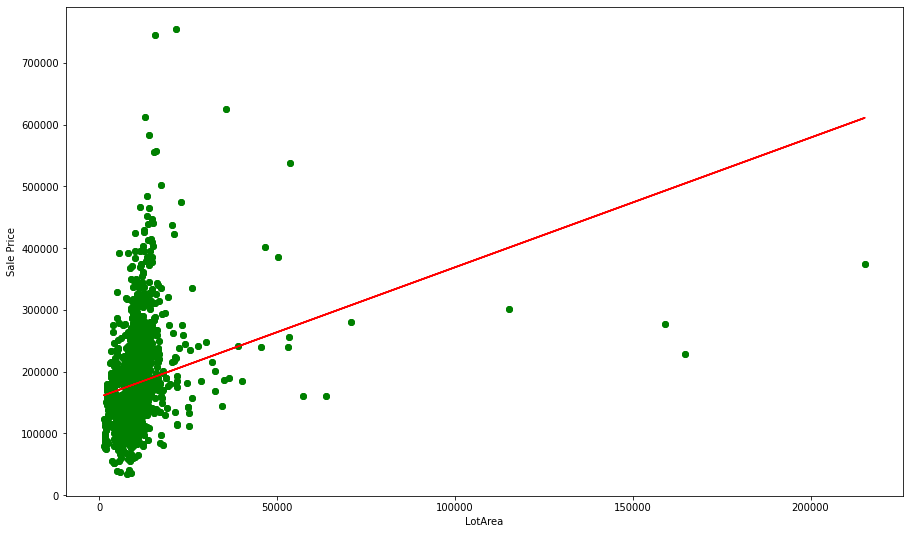

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 9))

x = df['LotArea']
y = df['SalePrice']

#use green as color for individual points
plt.plot(x, y , 'o', color='green')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#use red as color for regression line
plt.plot(x, m*x+b, color='red')#use green as color for individual points
plt.plot(x, y, 'o', color='green')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#use red as color for regression line
plt.plot(x, m*x+b, color='red')

plt.xlabel('LotArea')
plt.ylabel('Sale Price')

plt.show()

___

# Day 14 Classification Models

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
#mengecek jumlah dataset pada kolom heartdisease
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

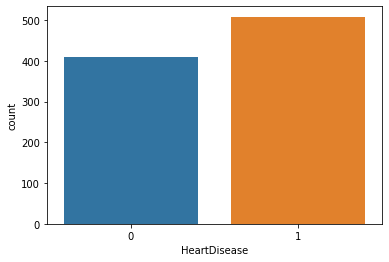

In [ ]:
import seaborn as sns
sns.countplot(df['HeartDisease'])

In [ ]:
#balancing dataset pada kolom heartdisease
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_mayoritas = df[(df['HeartDisease']==1)]
df_minoritas = df[(df['HeartDisease']==0)]

#proses upsampled kelas minoritas
df_minoritas_upsampled = resample(df_minoritas, replace = True, n_samples = 508, random_state = 42)

df_upsampled = pd.concat([df_minoritas_upsampled, df_mayoritas])

In [ ]:
df_upsampled['HeartDisease'].value_counts()

0    508
1    508
Name: HeartDisease, dtype: int64

In [ ]:
df = df_upsampled

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
164,52,F,ATA,140,225,0,Normal,140,N,0.0,Up,0
802,52,M,ASY,108,233,1,Normal,147,N,0.1,Up,0
657,44,M,NAP,130,233,0,Normal,179,Y,0.4,Up,0
170,29,M,ATA,120,243,0,Normal,160,N,0.0,Up,0
110,59,F,ATA,130,188,0,Normal,124,N,1.0,Flat,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

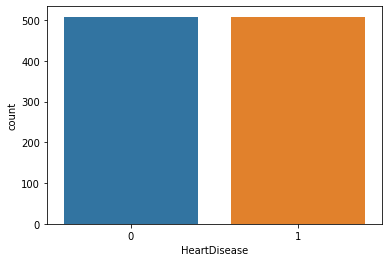

In [ ]:
import seaborn as sns
sns.countplot(df['HeartDisease'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 164 to 916
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1016 non-null   int64  
 1   Sex             1016 non-null   object 
 2   ChestPainType   1016 non-null   object 
 3   RestingBP       1016 non-null   int64  
 4   Cholesterol     1016 non-null   int64  
 5   FastingBS       1016 non-null   int64  
 6   RestingECG      1016 non-null   object 
 7   MaxHR           1016 non-null   int64  
 8   ExerciseAngina  1016 non-null   object 
 9   Oldpeak         1016 non-null   float64
 10  ST_Slope        1016 non-null   object 
 11  HeartDisease    1016 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 135.5+ KB


In [ ]:
#mengubah dataset dengan one hot encoding

df = pd.get_dummies(df)
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
164,52,140,225,0,140,0.0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
802,52,108,233,1,147,0.1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,1
657,44,130,233,0,179,0.4,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
170,29,120,243,0,160,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
110,59,130,188,0,124,1.0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,140,241,0,123,0.2,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
# mendefinisi feature matrix(X) and response vector(y)

X = df.loc[:, df.columns !='HeartDisease']
y = df['HeartDisease']

In [ ]:
# spliting dataset X dan Y menjadi data train 60% dan data test 40%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Model logistic Regression


In [ ]:
#Training Model

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_model = lr_model.fit(X_train, y_train)

In [ ]:
# Evaluasi Model logistic Regression

y_lr = lr_model.predict(X_test)

In [ ]:
#Klasifikasi Model Logistic Regression

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print('Laporan Klasifikasi Model Logistic Regression \n\n\n', classification_report(y_test, y_lr))

Laporan Klasifikasi Model Logistic Regression 


               precision    recall  f1-score   support

           0       0.87      0.92      0.89       212
           1       0.90      0.85      0.88       195

    accuracy                           0.88       407
   macro avg       0.89      0.88      0.88       407
weighted avg       0.89      0.88      0.88       407



Confusion Matrix dari Model Logistic Regression 



C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


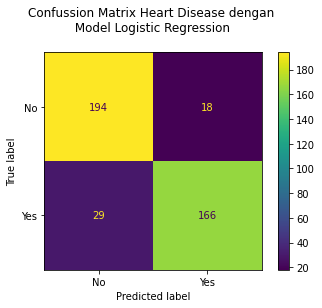

In [ ]:
#membuat confusion matrix dengan menggunakan model logistic regression

print('Confusion Matrix dari Model Logistic Regression \n\n', plot_confusion_matrix(lr_model, X_test, y_test))
plt.title('Confussion Matrix Heart Disease dengan \n Model Logistic Regression \n')
plt.xticks([0,1],['No','Yes'])
plt.yticks([0,1],['No','Yes'])
plt.show()

In [ ]:
#membuat evaluasi AUC 

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
print('Laporan AUC Model Logistic Regression')
print(auc(fpr, tpr))

Laporan AUC Model Logistic Regression
0.8831881954523464


# Model Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

In [ ]:
hyperparams = {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100,200],
    'n_estimators':[10,25,30,50,100,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = rf_model, param_grid = hyperparams, cv = 4, n_jobs = -1, verbose = 1, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.8981768145854834

In [ ]:
rf_best = grid_search.best_estimator_
rf_model = rf_best.fit(X_train, y_train)

In [ ]:
y_rf = rf_best.predict(X_test)

In [ ]:
print('Laporan Klasifikasi Model Random Forest \n\n\n', classification_report(y_test, y_rf))

Laporan Klasifikasi Model Random Forest 


               precision    recall  f1-score   support

           0       0.91      0.93      0.92       212
           1       0.92      0.90      0.91       195

    accuracy                           0.92       407
   macro avg       0.92      0.92      0.92       407
weighted avg       0.92      0.92      0.92       407



Confusion Matrix dari Model Random Forest 



C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


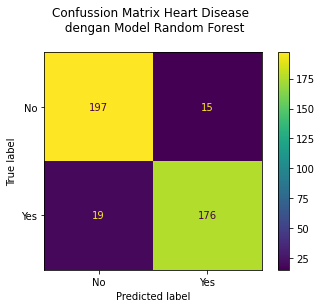

In [ ]:
print('Confusion Matrix dari Model Random Forest \n\n', plot_confusion_matrix(rf_model, X_test, y_test))
plt.title('Confussion Matrix Heart Disease \n dengan Model Random Forest\n')
plt.xticks([0,1],['No','Yes'])
plt.yticks([0,1],['No','Yes'])
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print('Laporan AUC Model Random Forest')
print(auc(fpr, tpr))

Laporan AUC Model Random Forest
0.9159046927914852


Which model is better at predicting Heart Disease? Interpret the reason.

Setelah dilakukan percobaan dengan beberapa model, model yang baik menggunakan model RANDOM FOREST